# Apresentação

O projeto a seguir visa tratar, prever e exibir dados sobre o valor de habitações. Para isso, foi feito:
* Tratamento de valores nulos, considerando as colunas vizinhas para preencher valores;
* Modelo de previsão, buscando prever o preço médio das habitações a partir das colunas de maior relação com ela;
* Dashboard interativo, visando apresentar os dados de forma eficaz e agradável;
* Fornecer Insights a partir das informações apresentadas no Dashboard.

# Análise Exploratória

Análise detalhada
com identificação
completa de padrões,
outliers e tendências,
interpretação crítica.

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [436]:
df_housing = pd.read_csv('housing.csv')

In [437]:
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [438]:
print('Número de Colunas: ', df_housing.shape[1])
print('Número de Linhas: ', df_housing.shape[0])

Número de Colunas:  10
Número de Linhas:  20640


In [439]:
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [440]:
def mostrar_nulls(dataset):
    for row in dataset:
        print(f'{row}: ', dataset[row].isnull().sum())

In [441]:
mostrar_nulls(df_housing)

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  207
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0


# Tratamento

## Tratamento de Valores Nulos

Acima, é possível verificar que a coluna 'total_bedrooms' é a única que possui valores nulos. Por se tratar do número de quartos em residências, não há lógica em deixar esse campo nulo, pois mesmo que improvável de não haver quartos em alguma casa, essa informação deveria ser apresentada como 0 para ser devidamente considerada na construção de gráficos.

Por conta disso, tais dados foram preenchidos e, visando uma maior acurácia, buscou-se utilizar as colunas adjacentes para preencher os valores faltantes, buscando padrões que determinassem o valor da coluna. Para alcançar esse objetivo, foi utilizada o módulo KNNImputer da biblioteca scikit-learn, que faz essa lógica automaticamente, permitindo especificar o número de vizinhos da coluna que devem ser considerados no preenchimento.

In [442]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
df_housing['ocean_proximity'] = label_encoder.fit_transform(df_housing['ocean_proximity'])

In [443]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

       ocean_proximity  
290                  3  
341                  3  
538                  3  
563                  3  
696                  3  
...                ...  
20267                4  
20268                4  
20372                0  
20460                0  
20484                0  

[207 rows x 10 columns]

In [444]:
from sklearn.impute import KNNImputer 

impute_knn = KNNImputer(n_neighbors=6) #Rever Número de Vizinhos 
array_inputed = impute_knn.fit_transform(df_housing)

df_housing = pd.DataFrame(array_inputed, columns=df_housing.columns)    

In [445]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [446]:
print(df_housing.iloc[290])

longitude               -122.160000
latitude                  37.770000
housing_median_age        47.000000
total_rooms             1256.000000
total_bedrooms           253.333333
population               570.000000
households               218.000000
median_income              4.375000
median_house_value    161900.000000
ocean_proximity            3.000000
Name: 290, dtype: float64


In [447]:
print(mostrar_nulls(df_housing))

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  0
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0
None


In [448]:
df_housing.to_csv('sem_nulos.csv')
#Testado no arquivo data_treatment_null_test.py. Passou no teste.

## Removendo Outliers

Removendo o primeiro e o último quartil, garantindo que não hajam outliers no valor mediano das casas.

In [449]:
df_housing['original_order'] = df_housing.index
df_housing = df_housing.sort_values(by=['median_house_value'])

In [450]:
Q1 = df_housing.quantile(0.25)
Q3 = df_housing.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_housing[~((df_housing < (Q1 - 1.5 * IQR)) | (df_housing > (Q3 + 1.5 * IQR))).any(axis=1)]

In [451]:
df_no_outliers = df_no_outliers.sort_values('original_order').drop(columns='original_order')
df_housing = df_housing.sort_values('original_order').drop(columns='original_order')

# Relação entre variáveis dependentes e independentes

In [452]:
'''
= df_housing.loc[
    (df_housing['median_house_value'] > left_limit) & 
    (df_housing['median_house_value'] < right_limit)
    ]
'''

"\n= df_housing.loc[\n    (df_housing['median_house_value'] > left_limit) & \n    (df_housing['median_house_value'] < right_limit)\n    ]\n"

In [453]:
df_no_outliers.to_csv('housing_no_nulls_nor_outliers.csv')
#Testado no arquivo data_treatment_null_test.py. Passou no teste.

In [454]:
def get_relacoes(dataset, modelo):
    return dataset.corr(modelo)

In [455]:
relacoes = get_relacoes(df_no_outliers, 'pearson')

<Axes: >

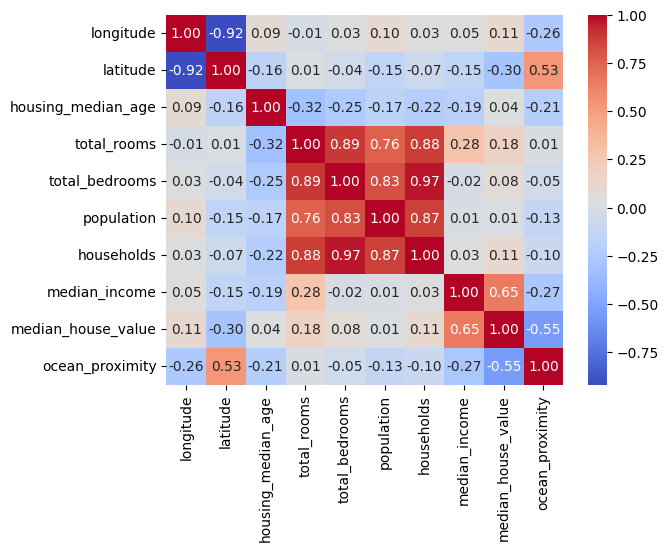

In [456]:
sns.heatmap(relacoes, annot=True, cmap='coolwarm', fmt='.2f')

# Modelos de regressão linear

## Usando Regressão Linear para prever o valor das casas

In [457]:
y = df_no_outliers['median_house_value']
x = df_no_outliers[['median_income', 'ocean_proximity', 'latitude', 'total_rooms', 'households', 'longitude', 'housing_median_age']]

In [458]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [459]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [460]:
model.coef_

array([ 3.47033762e+04, -4.62852233e+04, -1.45236130e+04, -6.18891821e+00,
        6.07750169e+01, -1.55473208e+04,  5.18300305e+02])

In [461]:
y_pred = model.predict(X_test)

In [462]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Erro de Média Absoluta: ', mean_absolute_error(y_test, y_pred))
print('Erro de Média Quadrada: ', mean_squared_error(y_test, y_pred))
print('Nota R2: ', r2_score(y_test, y_pred))

Erro de Média Absoluta:  41408.09612272056
Erro de Média Quadrada:  3220548183.1856256
Nota R2:  0.6025081799973877


In [463]:
model.score(X_train, y_train)

0.5818854186006099

In [464]:
model.score(X_test, y_test)

0.6025081799973877

### Gerar Gráficos

# Prevendo Valores

In [465]:
data = {
    'longitude': [-122.23, -122.22, -122.24, -122.25, -122.25],
    'latitude': [37.88, 37.86, 37.85, 37.85, 37.85],
    'housing_median_age': [41.0, 21.0, 52.0, 52.0, 52.0],
    'total_rooms': [880.0, 7099.0, 1467.0, 1274.0, 1627.0],
    'total_bedrooms': [129.0, 1106.0, 190.0, 235.0, 280.0],
    'population': [322.0, 2401.0, 496.0, 558.0, 565.0],
    'households': [126.0, 1138.0, 177.0, 219.0, 259.0],
    'median_income': [8.3252, 8.3014, 7.2574, 5.6431, 3.8462],
    'ocean_proximity': [3, 2, 3, 1, 1],
}

df_predict = pd.DataFrame(data)
df_predict = df_predict.drop(['population', 'total_bedrooms'], axis=1)
df_predict = df_predict[['median_income', 'ocean_proximity', 'latitude', 'total_rooms', 'households', 'longitude', 'housing_median_age']]

predicted_values = model.predict(df_predict)
df_predict["predicted_median_house_value"] = predicted_values.round(2)

In [466]:
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              3.0  
1      2401.0      1138.0         8.3014            358500.0              3.0  
2       496.0       177.0         7.2574            352100.0              3.0  
3       558.0       219.0         5.6431            341300.0              3.0  
4       565.0       259.0         3.8462            342200.0              3.0

In [467]:
df_predict.head()

median_income  ocean_proximity  latitude  total_rooms  households  \
0         8.3252                3     37.88        880.0       126.0   
1         8.3014                2     37.86       7099.0      1138.0   
2         7.2574                3     37.85       1467.0       177.0   
3         5.6431                1     37.85       1274.0       219.0   
4         3.8462                1     37.85       1627.0       259.0   

   longitude  housing_median_age  predicted_median_house_value  
0    -122.23                41.0                     231551.97  
1    -122.22                21.0                     289795.68  
2    -122.24                52.0                     200254.82  
3    -122.25                52.0                     240706.09  
4    -122.25                52.0                     178593.91

# Intervalos de Confiança (adaptar pro modelo preditivo)

In [468]:
import math

In [469]:
media = df_no_outliers['median_house_value'].mean()
media

175298.92467378412

In [470]:
Z = 1.96

In [471]:
std = df_no_outliers['median_house_value'].std()
print(std)

89033.20056450159


In [472]:
n = len(df_no_outliers['median_house_value'][:1000])
print(n)

1000


In [473]:
left_limit = media - (Z * (std / math.sqrt(n)))
print(left_limit)

169780.5897310792


In [474]:
right_limit = media + (Z * (std / math.sqrt(n)))
print(right_limit)

180817.25961648903


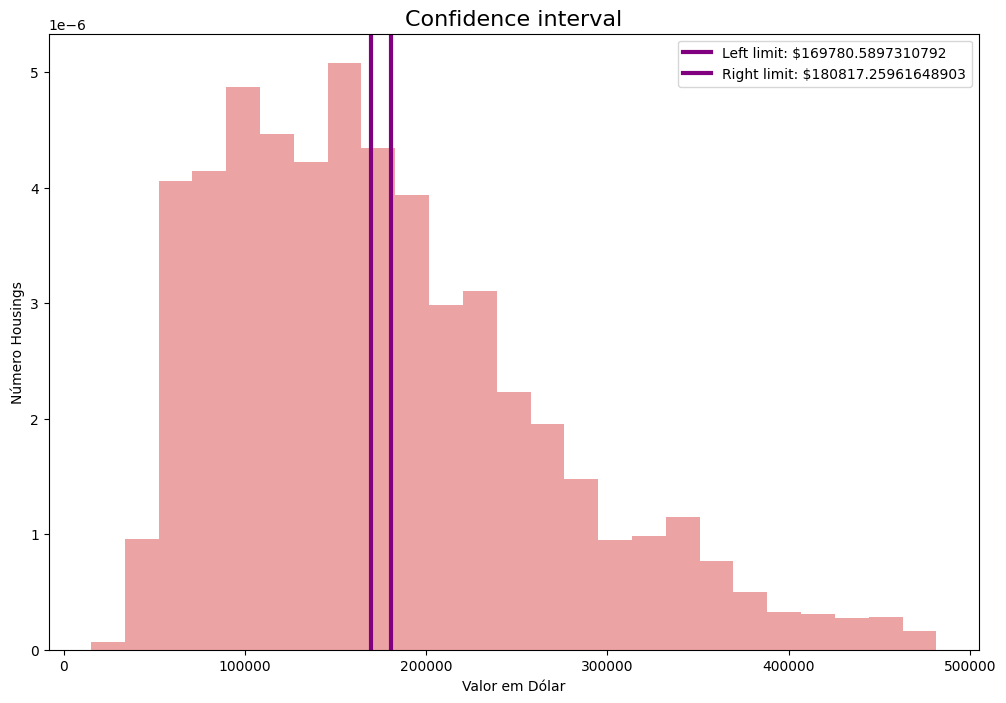

In [475]:
plt.figure(figsize=(12,8))
plt.hist(df_no_outliers['median_house_value'], bins=25, density=True, alpha=0.6, color='#e06666')

plt.axvline(left_limit, color='purple',lw=3, label=f'Left limit: ${left_limit}')
plt.axvline(right_limit, color='purple',lw=3, label=f'Right limit: ${right_limit}')

plt.xlabel('Valor em Dólar')
plt.ylabel('Número Housings')
plt.title('Confidence interval', fontsize=16)
plt.legend()